In [18]:
import tensorflow as tf 
import os
import cv2 #fokus pada manipulasi dan analisis gambar
import imghdr #alat bantu untuk mengenali jenis file gambar
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#path directory
data_dir = 'data'

In [21]:
os.listdir(data_dir)

['Pandar Island', 'Wae rebo Village']

In [22]:
#cek file
os.listdir(os.path.join(data_dir, 'Pandar Island'))

['download (1).jpg',
 'download (10).jpg',
 'download (11).jpg',
 'download (2).jpg',
 'download (3).jpg',
 'download (4).jpg',
 'download (5).jpg',
 'download (6).jpg',
 'download (7).jpg',
 'download (8).jpg',
 'download (9).jpg',
 'download.jpg',
 'images (1).jpg',
 'images (10).jpg',
 'images (100).jpg',
 'images (11).jpg',
 'images (12).jpg',
 'images (13).jpg',
 'images (14).jpg',
 'images (15).jpg',
 'images (16).jpg',
 'images (17).jpg',
 'images (18).jpg',
 'images (19).jpg',
 'images (2).jpg',
 'images (20).jpg',
 'images (21).jpg',
 'images (22).jpg',
 'images (23).jpg',
 'images (24).jpg',
 'images (25).jpg',
 'images (26).jpg',
 'images (27).jpg',
 'images (28).jpg',
 'images (29).jpg',
 'images (3).jpg',
 'images (30).jpg',
 'images (31).jpg',
 'images (32).jpg',
 'images (33).jpg',
 'images (34).jpg',
 'images (35).jpg',
 'images (36).jpg',
 'images (37).jpg',
 'images (38).jpg',
 'images (39).jpg',
 'images (4).jpg',
 'images (40).jpg',
 'images (41).jpg',
 'images (42)

In [31]:
image_exts = ['jpg', 'jpeg']

In [32]:
for image_class in os.listdir(data_dir):
    print(image_class)

Pandar Island
Wae rebo Village


In [33]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

download (1).jpg
download (10).jpg
download (11).jpg
download (2).jpg
download (3).jpg
download (4).jpg
download (5).jpg
download (6).jpg
download (7).jpg
download (8).jpg
download (9).jpg
download.jpg
images (1).jpg
images (10).jpg
images (100).jpg
images (11).jpg
images (12).jpg
images (13).jpg
images (14).jpg
images (15).jpg
images (16).jpg
images (17).jpg
images (18).jpg
images (19).jpg
images (2).jpg
images (20).jpg
images (21).jpg
images (22).jpg
images (23).jpg
images (24).jpg
images (25).jpg
images (26).jpg
images (27).jpg
images (28).jpg
images (29).jpg
images (3).jpg
images (30).jpg
images (31).jpg
images (32).jpg
images (33).jpg
images (34).jpg
images (35).jpg
images (36).jpg
images (37).jpg
images (38).jpg
images (39).jpg
images (4).jpg
images (40).jpg
images (41).jpg
images (42).jpg
images (43).jpg
images (44).jpg
images (45).jpg
images (46).jpg
images (47).jpg
images (48).jpg
images (49).jpg
images (5).jpg
images (50).jpg
images (51).jpg
images (52).jpg
images (53).jpg
im

In [34]:
#cek gambar di folder pandar island
img = cv2.imread(os.path.join('data', 'Pandar Island', 'images (100).jpg'))
img

array([[[120,  66,   3],
        [120,  66,   3],
        [120,  66,   3],
        ...,
        [141,  87,  22],
        [141,  87,  22],
        [141,  87,  22]],

       [[121,  67,   4],
        [121,  67,   4],
        [120,  66,   3],
        ...,
        [141,  87,  22],
        [141,  87,  22],
        [141,  87,  22]],

       [[124,  68,   3],
        [124,  68,   3],
        [124,  68,   3],
        ...,
        [142,  88,  23],
        [142,  88,  23],
        [142,  88,  23]],

       ...,

       [[132,  87,   6],
        [132,  87,   6],
        [129,  86,   7],
        ...,
        [ 49,  99,  97],
        [ 61, 114, 111],
        [ 48,  98,  96]],

       [[134,  87,   6],
        [132,  87,   6],
        [131,  85,   8],
        ...,
        [ 33,  83,  81],
        [ 49,  99,  97],
        [ 36,  86,  84]],

       [[134,  87,   6],
        [131,  86,   5],
        [130,  84,   7],
        ...,
        [ 20,  69,  67],
        [ 41,  90,  88],
        [ 29,  78,  76]]

In [35]:
#cek ukuran
img.shape

(163, 309, 3)

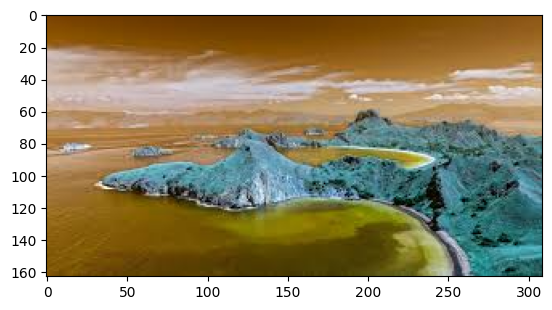

In [36]:
plt.imshow(img)

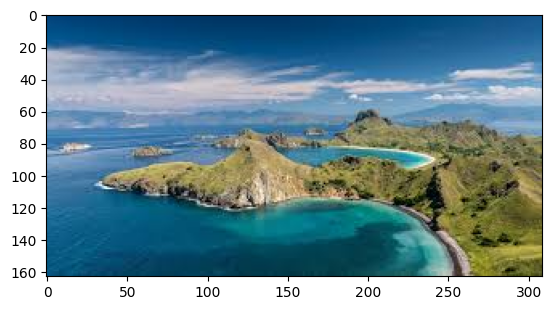

In [37]:
#ubah ke rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
#pilih gambar yg jpg
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        img_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exts:
                print('remove non jpg image {}'.format(img_path))
                os.remove(img_path)
        except:
            print('ada masalah dengan gambar {}'.format(img_path))

remove non jpg image data\Wae rebo Village\916101230.webp
remove non jpg image data\Wae rebo Village\IMG_20240402_161631-207941373.webp
remove non jpg image data\Wae rebo Village\Picsart_24-02-12_14-39-58-979-2936270131.webp
remove non jpg image data\Wae rebo Village\wae-rebo-tour-1.webp
remove non jpg image data\Wae rebo Village\wae-rebo-village-tour-orig_orig.webp


## load data

In [39]:
#load data
data = tf.keras.utils.image_dataset_from_directory('data')


Found 503 files belonging to 2 classes.


In [40]:
#ubah data supaya bisa diiterasi
data_iterator = data.as_numpy_iterator()
data_iterator

In [41]:
#akses datanya
batch = data_iterator.next()
#image dan label

In [42]:
len(batch) 

2

In [43]:
#gambar
batch[0].shape 

(32, 256, 256, 3)

In [44]:
#label
batch[1]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

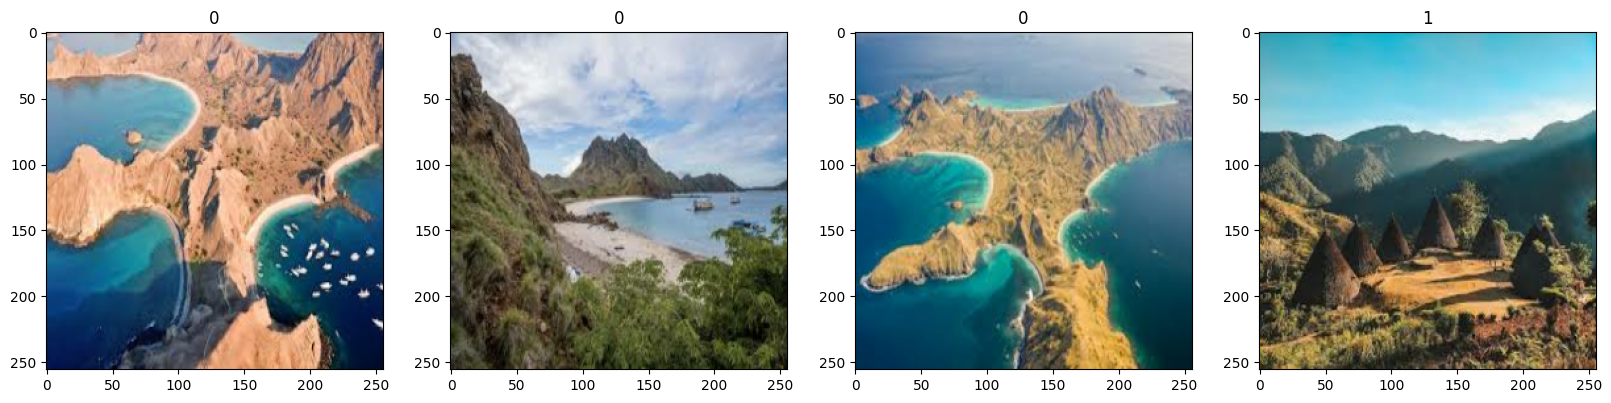

In [46]:
#identifikasi kelas
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 = pandar

1 = wae rebo

## processing data

In [55]:
data = data.map(lambda x,y: (x/225.0, y))

In [57]:
data.as_numpy_iterator().next()[0].min()

0.0

In [58]:
data.as_numpy_iterator().next()[0].max()

4.4220902e-10

### split data

In [59]:
len(data) #ngitung batch, per batch ada 32 gamber

16

In [65]:
train_size = int(len(data)*0.8)
test_size = int(len(data)*0.2) + 1

train_dataset = data.take(train_size)
test_dataset = data.skip(train_size).take(test_size)

In [66]:
len(train_dataset)

12

In [67]:
len(test_dataset)

4